### Linear Regression and Learning Curve challenges

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
%matplotlib inline

##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [11]:
np.random.seed(8)

def logarithmic_func(x):
    return np.log(x)

x_plot = np.arange(1,100)
samples = 100
X = np.random.uniform(1, 100, size=samples)[:, np.newaxis]
#X = np.sort(X)
y = logarithmic_func(X) + np.random.normal(scale=0.3, size=samples)[:, np.newaxis]

In [13]:
degree = 2 
model_that_works = make_pipeline(PolynomialFeatures(degree=degree), linear_model.LinearRegression())
model_that_works.fit(X,y)
predictions = model_that_works.predict(X)
residuals = np.array(np.asarray(y) - np.array(predictions))

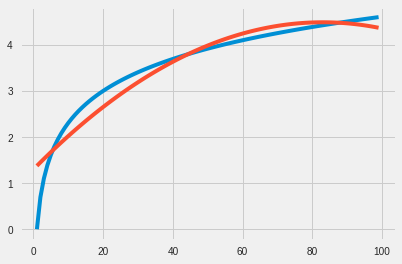

In [14]:
fig, ax = plt.subplots()
plt.plot(x_plot,logarithmic_func(x_plot))
plt.plot(x_plot, model_that_works.predict(x_plot.reshape(-1,1)))
plt.show();

In [15]:
transformer = FunctionTransformer(np.log)
log_model = make_pipeline(transformer, linear_model.LinearRegression())
log_model.fit(X,y)
predictions_log = log_model.predict(X)
residuals_log = np.array(np.asarray(y) - np.array(predictions_log))

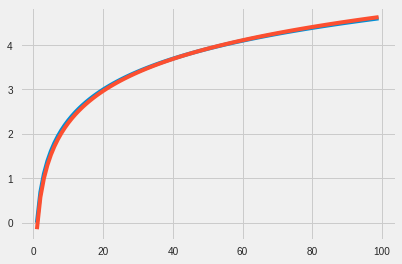

In [16]:
fig, ax = plt.subplots()
plt.plot(x_plot,logarithmic_func(x_plot))
plt.plot(x_plot, log_model.predict(x_plot.reshape(-1,1)))
plt.show();

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [82]:
b_0 = 5
b_1 = 10
b_2 = 8

x_plot = np.arange(1,101)
samples = 100
#X = np.random.uniform(1, 101, size=samples)[:, np.newaxis]
y = b_0 + b_1*X + b_2*(X**2)  + np.random.normal(scale=0.3, size=samples)[:, np.newaxis]

TypeError: random_sample() takes at most 1 positional argument (2 given)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=8)

In [49]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
predictions_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print(mse_train)
predictions_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print(mse_test)
print('Did MSE improve on the test sample? {}'.format(mse_train > mse_test))

34654124.9373
34660866.4361
Did MSE improve on the test sample? False


##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [50]:
training_error = []
test_error = []
r_squared_test = []
r_squared_train = []
degrees = list(range(8))

In [51]:
for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.LinearRegression())
    poly_model.fit(X_train,y_train)
    
    predictions_train = poly_model.predict(X_train)
    mse_train = mean_squared_error(y_train, predictions_train)
    training_error.append(mse_train)
    r_squared_train.append(poly_model.score(X_train, y_train))
    
    predictions_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    test_error.append(mse_test)
    r_squared_test.append(poly_model.score(X_test, y_test))

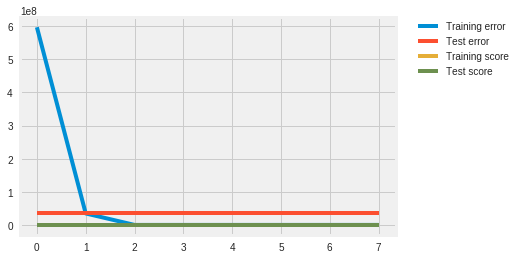

In [53]:
fig, ax = plt.subplots()
plt.plot(degrees,training_error, label='Training error')
plt.plot(degrees, test_error, label='Test error')
plt.plot(degrees, r_squared_train, label='Training score')
plt.plot(degrees, r_squared_test, label='Test score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [77]:
train_error = []
test_error = []

In [78]:
train_set_size = np.linspace(0.05, 0.8, 16)
for i in train_set_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = i, random_state=8)
              
    poly_model = make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression())
    poly_model.fit(X_train,y_train)

    predictions_train = poly_model.predict(X_train)
    mse_train = mean_squared_error(y_train, predictions_train)
    train_error.append(mse_train)
    
    predictions_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    test_error.append(mse_test)

In [79]:
x_plot = list(train_set_size)

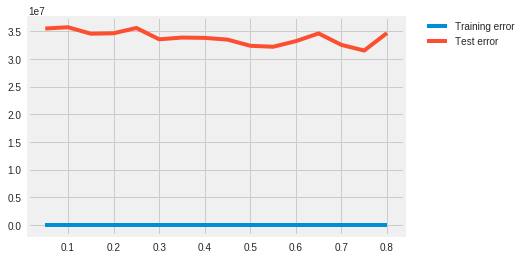

In [80]:
fig, ax = plt.subplots()
plt.plot(x_plot,train_error, label='Training error')
plt.plot(x_plot, test_error, label='Test error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

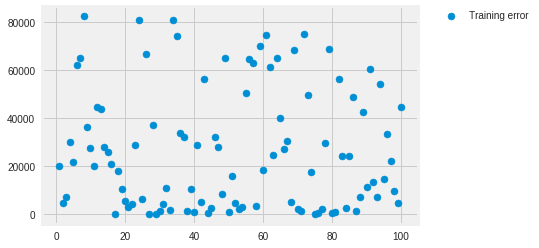

In [86]:
fig, ax = plt.subplots()
plt.scatter(list(range(1,101)), y, label='Training error')
#plt.plot(x_plot, test_error, label='Test error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();